<a href="https://colab.research.google.com/github/SHIVA20-GUPTA/FlightPrice/blob/main/Flight_fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries


In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv('/content/Flight_data_Train_set.csv')
test_data=pd.read_csv('/content/Flight_Test_set.csv')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Basic Check

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


* As we see, this dataset has only 1 numercial column that is 'Price' and rest are object type

In [6]:
# To check row and column
train_data.shape

(10683, 11)

In [7]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
# dropping nan value
train_data.dropna(inplace=True)

In [9]:
# After dropping nan check shape
train_data.shape 

(10682, 11)

In [10]:
# To check null value
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.describe(include='O') # give information of object data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4536,4536,2376,233,423,550,5625,8344


In [12]:
train_data.describe()# To check statistics of numerical column

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Introduction of project
* Airline: Name of the Airline from which the Ticket is Booked.
* Date_of_Journey: Date of Journey of the Traveller.
* Source: Source from which the Airline Would Departure.
* Destination: Destination to Which Airline Would Arrive.
* Route: Route of the Airline from Source to Destination.
* Dep_Time: Time at which Flight Would Departure from the Source.
* Arrival_Time: Time at which Flight Would Arrive at the Destination.
* Duration: Duration that Airline Takes to fly from Source to Destination.
* Total_Stops: Total No of Stops that Airline takes Between Source and Destination.
* Additional_Info: Any Additional Info about the Airline.
* Price: Fare of the Ticket to fly from Source to Destination.


# Data preprocessing

In [13]:
train_data['Journey_day']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [14]:
train_data['Journey_month']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [15]:
train_data['Journey_year']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.year

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [17]:
# since we have converted date_of_journey column into intergers, Now we can drop 
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [18]:
# Departure time is when a plane leaves the gate.
# Extracting Hours
train_data['Dep_hour']=pd.to_datetime(train_data.Dep_Time).dt.hour
# Extracting minute
train_data['Dep_min']=pd.to_datetime(train_data.Dep_Time).dt.minute
# Now we drop Dep_time 
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [19]:
# Arrivaltime when the plane pulls up to the gate
# Extracting Hours
train_data['Arrival_hour']=pd.to_datetime(train_data.Arrival_Time).dt.hour
# Extracting minute
train_data['Arrival_min']=pd.to_datetime(train_data.Arrival_Time).dt.minute
# Now we drop Arrival_time 
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [20]:
# Time taken by plane to reach destinations is called duration
# it is the diiference between deparature TIME and ARRIVAL TIME

# Assigning and converting Duration column into list
duration=list(train_data['Duration'])
for i in range(len(duration)):
  if len(duration[i].split()) !=2:   # chcek  if duration contains only hour or mins
    if "h" in duration[i]:
      duration[i] = duration[i].strip( ) +" 0m" #Adds 0 minute
    else: 
      duration[i]="0h " + duration[i]  # adds 0 hour

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep='h')[0])) # Extract hours from duration
  duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))  # Extracts only minutes from duration

In [21]:
# Adding duration_hours and duration_mins list to train_data dataframe
train_data['Duration_hours']=duration_hours
train_data['Duration_mins']=duration_mins
# Drop Duration column
train_data.drop(['Duration'],axis=1,inplace=True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


### Handling Cateorical data
* 1. Nomial data--> data are not in any order -->OneHotEncoder is used in this case
* 2. Ordinal data --> data are in order --> LabelEncoder is used in this case.

In [23]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

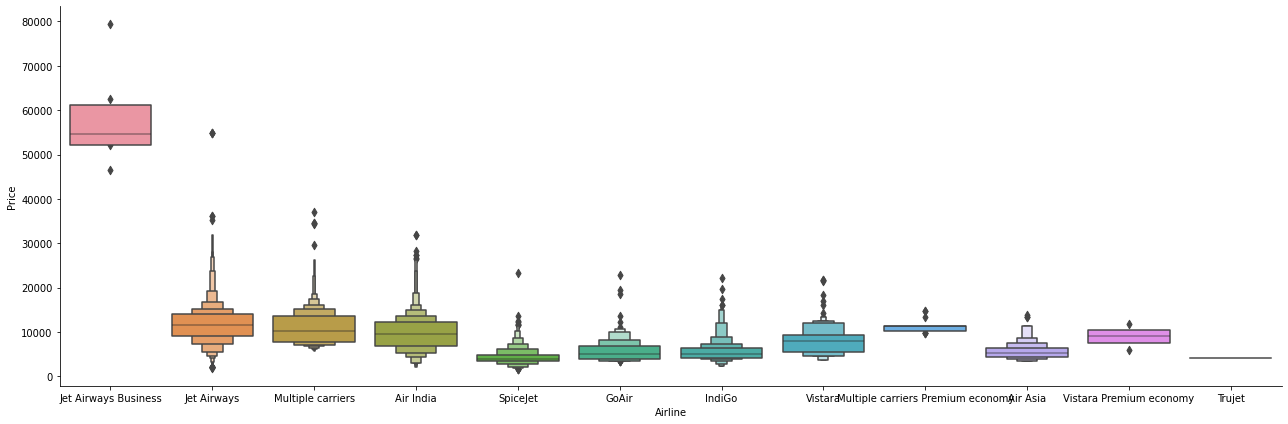

In [24]:
# Airlane vs Price
sns.catplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

*  from graph we can see that Jet airways Business have the Highest Price.
* apart from the first Airline almost all are having similar median

In [25]:
# As Airline is Nomial categorical data we will perform One Hot Encoding
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [26]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

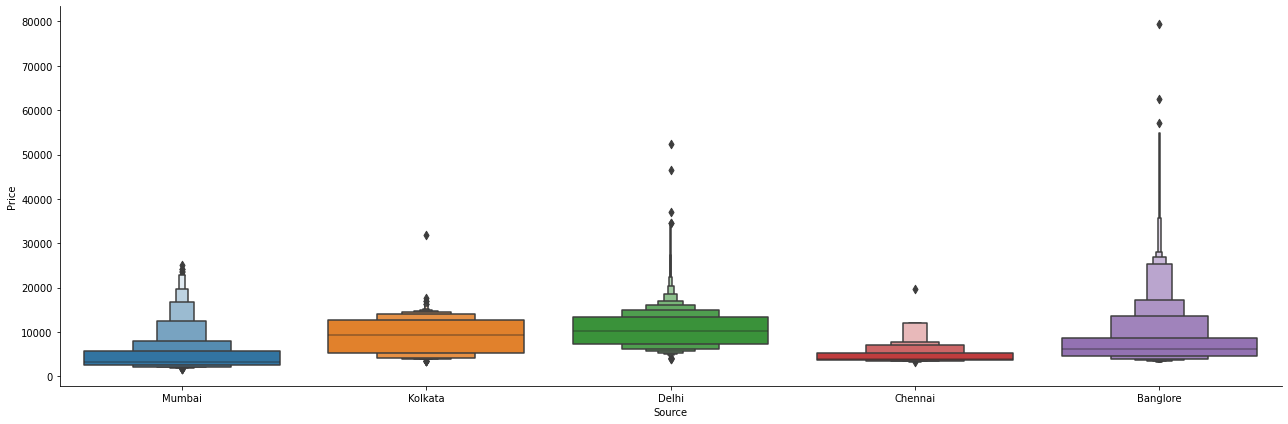

In [27]:

#EDA
# Source vs price
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Source',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [28]:
# As source is Nomial categorical data we will perform One Hot Encoding
Source=train_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

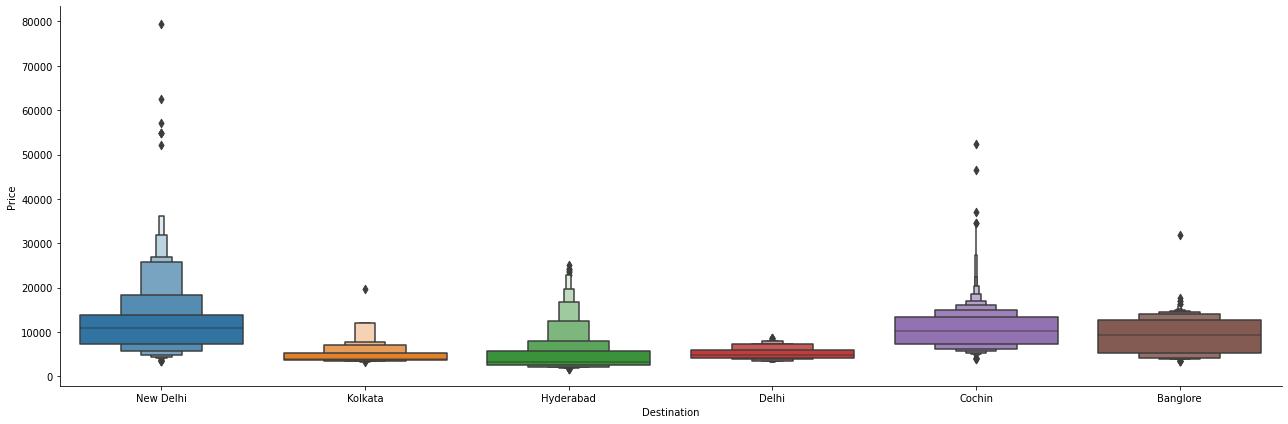

In [30]:
#EDA
# Destination vs price
sns.catplot(y='Price',x='Destination',data=train_data.sort_values('Destination',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [31]:
# As Destination is Nomial categorical data we will perform One Hot Encoding
Destination=train_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
train_data['Route'].value_counts()

DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64

In [33]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

* Addtional_Info contains almost 80% no_info, so we need to drop it 

In [34]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

* Route and Total_stops are related to each other so drop route column


In [35]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [36]:
# As Total_stops is case of Ordinal Categorical type we perform Label Encoder
train_data.replace({'non-stop':0,"1 stop":1,"2 stops":2,"3 stops": 3,"4 stops": 4},inplace =True)

In [37]:
# Concatenate dataframe --> train data+ airline +source +destination
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [38]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,...,0,0,0,0,0,0,0,0,0,1


In [39]:
data_train.drop(['Airline',"Source",'Destination'],axis=1,inplace=True)

In [40]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [41]:
data_train.shape

(10682, 31)

# Test set

In [42]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
# preprocessing
print("Test data Info")
print("-"*75)
print(test_data.info())
print()
print()

print("Null values: ")
print("-"*75)
test_data.dropna(inplace=True)
print(test_data.isnull().sum())

# Date_of _journey
test_data['Journey_day']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data['Journey_month']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month
# since we have converted date_of_journey column into intergers, Now we can drop 
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

# departure taken
# Extracting Hours
test_data['Dep_hour']=pd.to_datetime(test_data.Dep_Time).dt.hour
# Extracting minute
test_data['Dep_min']=pd.to_datetime(test_data.Dep_Time).dt.minute
# Now we drop Dep_time 
test_data.drop(['Dep_Time'],axis=1,inplace=True)

#Arrival time
 # Extracting Hours
test_data['Arrival_hour']=pd.to_datetime(test_data.Arrival_Time).dt.hour
# Extracting minute
test_data['Arrival_min']=pd.to_datetime(test_data.Arrival_Time).dt.minute
# Now we drop Arrival_time 
test_data.drop(['Arrival_Time'],axis=1,inplace=True)

# Duration
# Assigning and converting Duration column into list
duration=list(test_data['Duration'])
for i in range(len(duration)):
  if len(duration[i].split()) !=2:   # chcek  if duration contains only hour or mins
    if "h" in duration[i]:
      duration[i] = duration[i].strip( ) +" 0m" #Adds 0 minute
    else: 
      duration[i]="0h " + duration[i]  # adds 0 hour

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep='h')[0])) # Extract hours from duration
  duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))  # Extracts only minutes from duration
# Adding duration_hours and duration_mins list to train_data dataframe
test_data['Duration_hours']=duration_hours
test_data['Duration_mins']=duration_mins
# Drop Duration column
test_data.drop(['Duration'],axis=1,inplace=True)

# Converting Cateogorical into Numerical


# Airline
# As Airline is Nomial categorical data we will perform One Hot Encoding
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

# source 
# As source is Nomial categorical data we will perform One Hot Encoding
Source=test_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

# DESTINATION
# As Destination is Nomial categorical data we will perform One Hot Encoding
Destination=test_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

# Destination
# As Destination is Nomial categorical data we will perform One Hot Encoding
Destination=test_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

# As Total_stops is case of Ordinal Categorical type we perform Label Encoder
test_data.replace({'non-stop':0,"1 stop":1,"2 stops":2,"3 stops": 3,"4 stops": 4},inplace =True)

# Concatenate dataframe --> train data+ airline +source +destination
data_test=pd.concat([test_data,Airline,Source,Destination],axis=1)

data_test.drop(['Airline',"Source",'Destination'],axis=1,inplace=True)

data_test.head()

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values: 
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,1,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,0,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,0,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,24.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Feature Selection

* Finding out the best feature which will contribute and have good relation with target variable.

In [44]:
data_train.shape

(10682, 31)

In [45]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [46]:
X=data_train.loc[:,['Total_Stops',  'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [47]:
y=data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

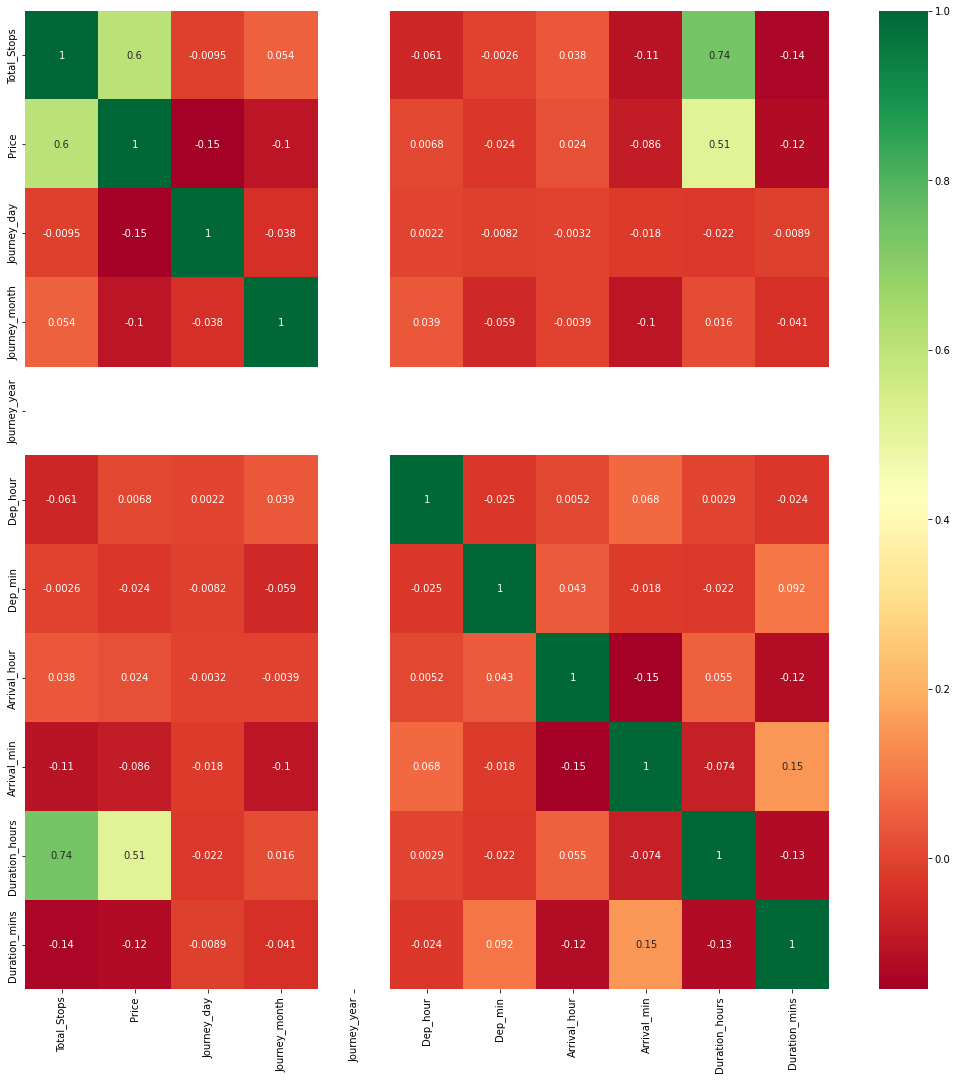

In [48]:
# find the correlation between independent and dependent atrributes
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")

plt.show()

* if two independent feature are highly correlated above 0.8 or 0.9, then drop one feature 

In [49]:
# important feature using Extra Trees Regressor
# Extra Trees regressor helps us to find out the importance features
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [50]:
print(selection.feature_importances_)

[2.48541977e-01 1.43204896e-01 5.40196180e-02 0.00000000e+00
 2.44559145e-02 2.15278522e-02 2.71744974e-02 1.99445023e-02
 1.14999266e-01 1.74518922e-02 9.37852367e-03 2.22728675e-03
 1.65279978e-02 1.33866778e-01 6.67532967e-02 1.84806473e-02
 8.51588701e-04 3.17065883e-03 1.13057167e-04 5.36889579e-03
 9.89544012e-05 5.28317347e-04 1.06006579e-02 3.10466971e-03
 7.57376670e-03 7.27526772e-03 1.27594961e-02 4.91955694e-03
 4.90897404e-04 2.45892705e-02]


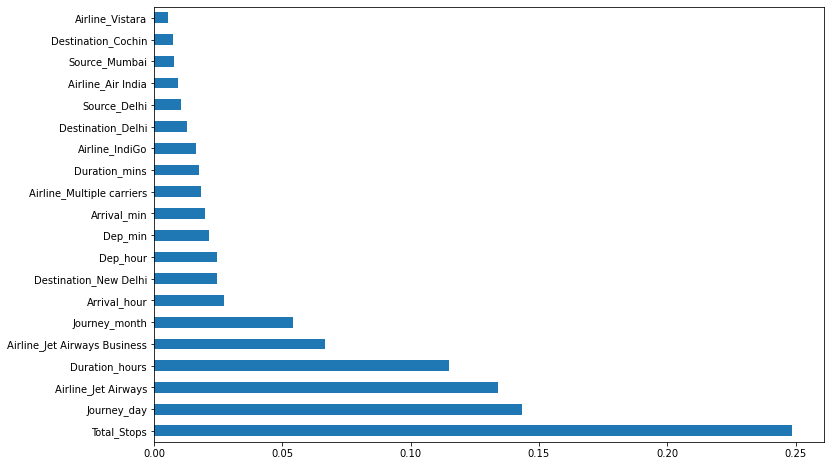

In [51]:
# plot graph of feature importance for better visualiztion

plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

* Total stops is the most important feature 

# Fitting model using random Forest

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:

from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [54]:
y_pred=reg_rf.predict(X_test)

In [55]:
reg_rf.score(X_train,y_train)

0.9536056152373066

In [56]:
reg_rf.score(X_test,y_test)

0.7981470221046352

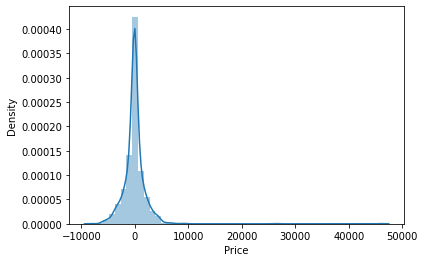

In [57]:
sns.distplot(y_test-y_pred)
plt.show()

* showing us gaussian distribution

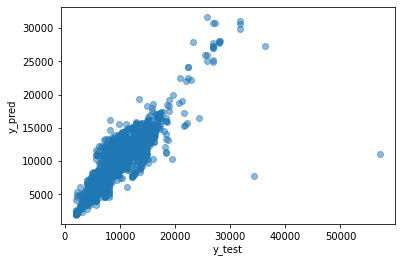

In [58]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [59]:
from sklearn import metrics

In [60]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1171.423768233002
MSE: 4352365.278579639
RMSE: 2086.232316540907


In [61]:
metrics.r2_score(y_test,y_pred)

0.7981470221046352

# Hyper parameter tuning

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# number of trees in Random forest
n_estimators =[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
# Number of features to consider at every split
max_features=['auto','sqrt']
# maximun number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
# minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]


In [64]:
# create the random grid

random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [65]:
# Random search of parameters ,using 5 fold cross validation,
#search across 100 differrent combinations
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [68]:
prediction=rf_random.predict(X_test)

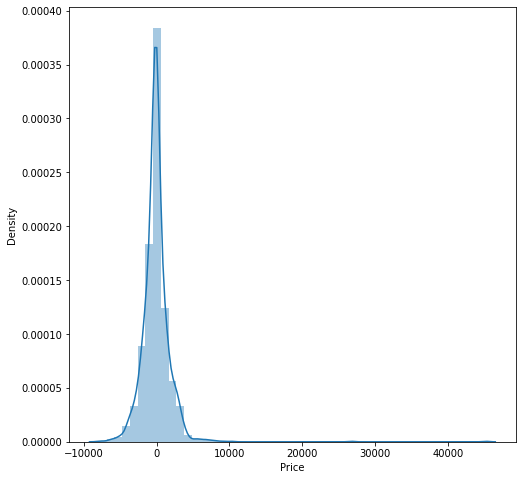

In [69]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

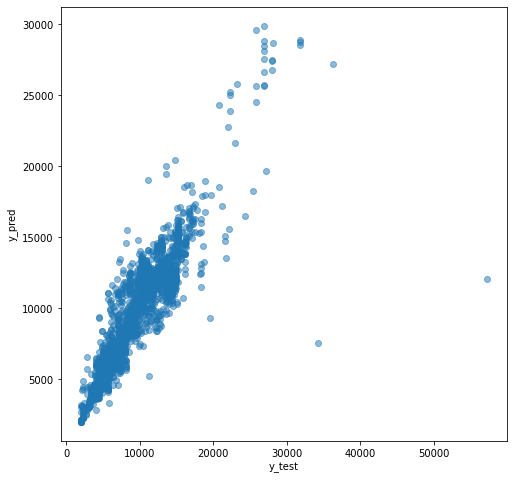

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [71]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1163.8503170042
MSE: 4041524.4404533217
RMSE: 2010.3543071939637


## Save the model to reuse it again

In [72]:
import pickle
#open a file,where you want to store the data
file=open('flight_rf.pkl','wb')

# dump information to that file
pickle.dump(rf_random,file)

In [73]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)

In [74]:
y_prediction=forest.predict(X_test)

In [75]:
metrics.r2_score(y_test,y_prediction)

0.8125631257198548